In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [2]:
data = pd.read_csv('Weather_data.csv')

In [3]:
data

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,NaN,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,NaN,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,NaN,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,NaN,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime_utc  98913 non-null  object 
 1    _conds       98845 non-null  object 
 2    _dewptm      98294 non-null  float64
 3    _fog         98913 non-null  int64  
 4    _hail        98913 non-null  int64  
 5    _heatindexm  29111 non-null  float64
 6    _hum         98160 non-null  float64
 7    _precipm     0 non-null      float64
 8    _pressurem   98682 non-null  float64
 9    _rain        98913 non-null  int64  
 10   _snow        98913 non-null  int64  
 11   _tempm       98244 non-null  float64
 12   _thunder     98913 non-null  int64  
 13   _tornado     98913 non-null  int64  
 14   _vism        94497 non-null  float64
 15   _wdird       84533 non-null  float64
 16   _wdire       84533 non-null  object 
 17   _wgustm      1063 non-null   float64
 18   _windchillm  573 non-null

In [5]:
data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,98294.000000,98913.000000,98913.000000,29111.000000,98160.000000,0.0,9.868200e+04,98913.000000,98913.00000,98244.000000,98913.000000,98913.000000,94497.000000,84533.000000,1063.000000,573.000000,96560.000000
mean,15.817130,0.067109,0.000131,35.659606,57.774358,NaN,1.951861e+03,0.026498,0.00001,25.578427,0.009362,0.000020,2.419885,162.550980,37.704516,5.708202,7.685854
std,7.096917,0.250213,0.011464,5.013579,23.754463,NaN,3.217101e+05,0.160612,0.00318,8.464732,0.096303,0.004497,20.970678,120.019889,6.841070,1.205967,11.995965
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.00000,19.000000,0.000000,0.000000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,58.000000,NaN,1.008000e+03,0.000000,0.00000,27.000000,0.000000,0.000000,2.000000,150.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,77.000000,NaN,1.014000e+03,0.000000,0.00000,32.000000,0.000000,0.000000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.00000,90.000000,1.000000,1.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [6]:
data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [7]:
def Headercorr(df):
    columns = data.columns
    for i in range(len(columns)):
        df.rename(columns={columns[i]:columns[i].replace(" ","") }, inplace=True)

Headercorr(data)

In [8]:
col_names = data.columns
col_names

Index(['datetime_utc', '_conds', '_dewptm', '_fog', '_hail', '_heatindexm',
       '_hum', '_precipm', '_pressurem', '_rain', '_snow', '_tempm',
       '_thunder', '_tornado', '_vism', '_wdird', '_wdire', '_wgustm',
       '_windchillm', '_wspdm'],
      dtype='object')

In [9]:
data

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,20161130-12:30,Mist,17.0,0,0,NaN,78.0,NaN,1015.0,0,0,21.0,0,0,1.5,0.0,North,NaN,NaN,0.0
98909,20161130-13:00,Mist,16.0,0,0,NaN,83.0,NaN,1015.0,0,0,19.0,0,0,1.2,0.0,North,NaN,NaN,0.0
98910,20161130-15:00,Patches of Fog,16.0,1,0,NaN,90.0,NaN,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
98911,20161130-18:00,Patches of Fog,14.0,1,0,NaN,96.0,NaN,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


<AxesSubplot:>

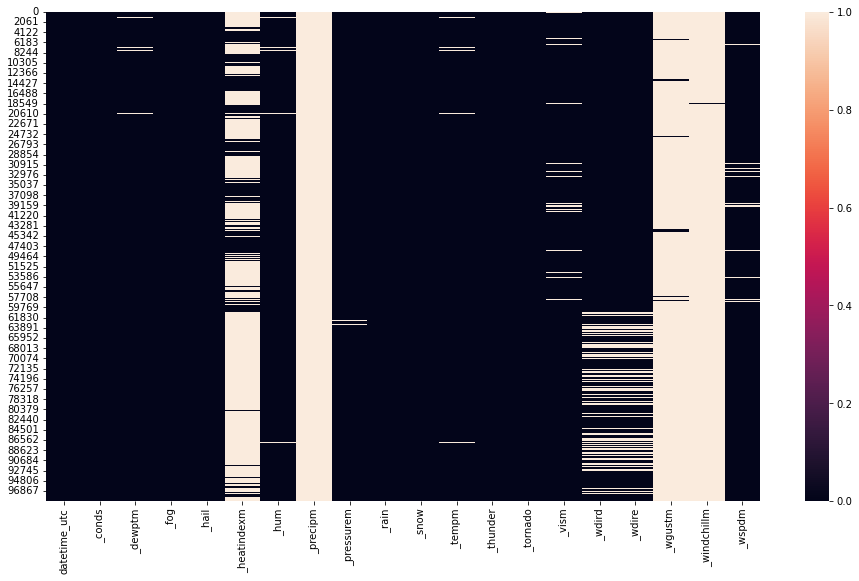

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())

In [11]:
data = data.dropna(thresh=data.shape[0]*0.3,how='all',axis=1)

(98913, 16)


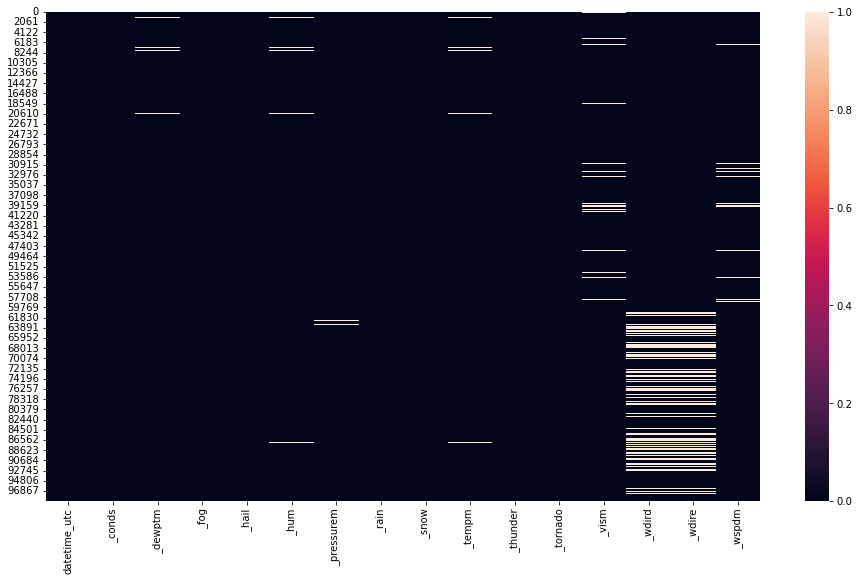

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())
print(data.shape)

Here we see that some of the temp data is missing, so lets remove this. 

In [13]:
data.dropna(subset=['_tempm'],inplace=True)

C:\Users\kp779\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
import datetime
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'].apply(lambda x: datetime.datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))

C:\Users\kp779\AppData\Local\Temp/ipykernel_15792/2546197487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime_utc'] = pd.to_datetime(data['datetime_utc'].apply(lambda x: datetime.datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))


In [15]:
data

,datetime_utc,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,2016-11-30 12:30:00,Mist,17.0,0,0,78.0,1015.0,0,0,21.0,0,0,1.5,0.0,North,0.0
98909,2016-11-30 13:00:00,Mist,16.0,0,0,83.0,1015.0,0,0,19.0,0,0,1.2,0.0,North,0.0
98910,2016-11-30 15:00:00,Patches of Fog,16.0,1,0,90.0,1016.0,0,0,17.0,0,0,1.0,NaN,NaN,0.0
98911,2016-11-30 18:00:00,Patches of Fog,14.0,1,0,96.0,1017.0,0,0,15.0,0,0,1.0,NaN,NaN,0.0


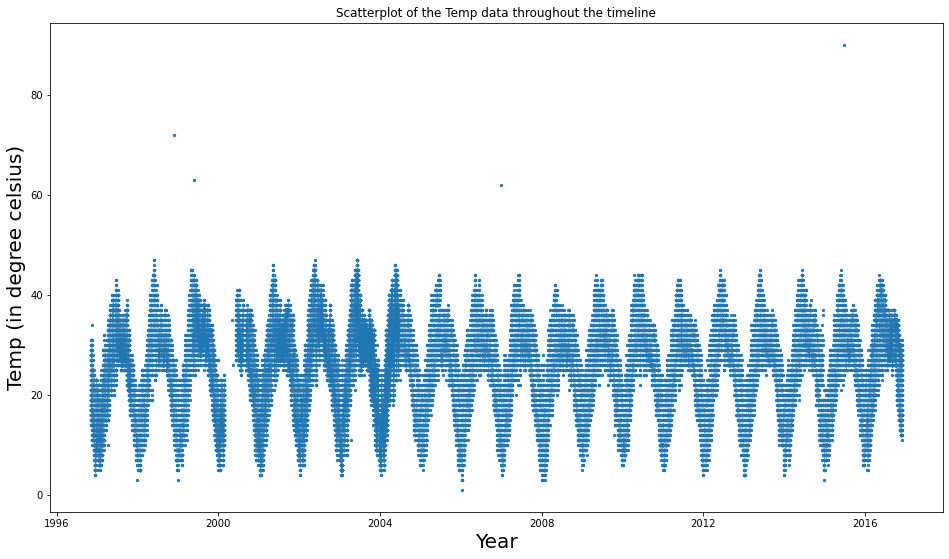

In [16]:
plt.figure(figsize=(16,9))
plt.scatter(data['datetime_utc'],data['_tempm'],s=5 )
plt.xlabel('Year', size = 20)
plt.ylabel('Temp (in degree celsius)', size = 20)
plt.title('Scatterplot of the Temp data throughout the timeline')
plt.show()

Here with this scatterplot we can say that there are some outliers in the data that went up to 75 (degree celcius)  or more and also that during the year 2000 onwards, for few months the data is missing. That may create problem to our model so we would require to take the continuous data only while removing the outliers as well.

So lets first of all trim our data from the year where its non-continuous. 

In [17]:
data = data[32000:]

<AxesSubplot:xlabel='_tempm', ylabel='Count'>

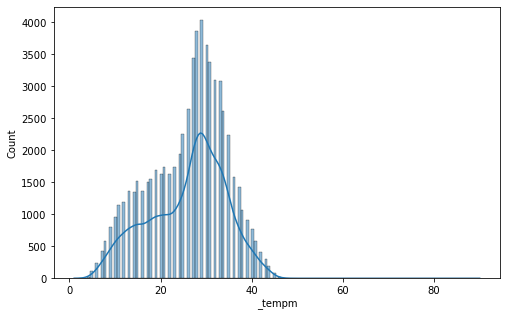

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data['_tempm'], kde=True)

C:\Users\kp779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_tempm'>

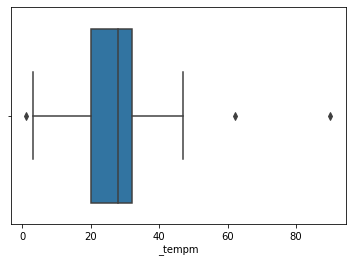

In [19]:
sns.boxplot(data['_tempm'])

In [20]:
temp_ol = data[(data['_tempm'] > 50)].index
temp_ol

Int64Index([68077, 91391], dtype='int64')

In [21]:
data.drop(temp_ol, inplace=True)

C:\Users\kp779\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
data.shape

(66242, 16)

In [23]:
data = data.set_index('datetime_utc',drop=True)
data.index.name = 'datetime'

In [24]:
data.shape

(66242, 15)

In [25]:
by_min = data.index.minute.value_counts()
by_min

0     45430
30    20645
21      109
51       29
50       14
25        3
40        3
45        1
22        1
53        1
20        1
52        1
3         1
15        1
34        1
32        1
Name: datetime, dtype: int64

In [26]:
by_hour = data.index.hour.value_counts()
by_hour

3     5649
6     5588
9     5564
12    5548
0     5531
18    5508
15    5464
21    5462
11    1592
10    1589
7     1562
8     1548
5     1541
4     1540
2     1531
13    1466
1     1228
17    1203
19    1202
22    1200
20    1199
23    1193
16    1193
14    1141
Name: datetime, dtype: int64

In [27]:
#Lets get our categorical columns and then resample the data

categoricalColumns = list(set(data.columns) - set(data._get_numeric_data().columns))
categoricalColumns

['_conds', '_wdire']

Lets not go with the minutes and keep it till hour interval only. Because we can see that the Minutes data is not continuous.

In [28]:
newdata = data.resample('H').mean().interpolate()
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129864 entries, 2002-02-06 22:00:00 to 2016-11-30 21:00:00
Freq: H
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _dewptm     129864 non-null  float64
 1   _fog        129864 non-null  float64
 2   _hail       129864 non-null  float64
 3   _hum        129864 non-null  float64
 4   _pressurem  129864 non-null  float64
 5   _rain       129864 non-null  float64
 6   _snow       129864 non-null  float64
 7   _tempm      129864 non-null  float64
 8   _thunder    129864 non-null  float64
 9   _tornado    129864 non-null  float64
 10  _vism       129864 non-null  float64
 11  _wdird      129864 non-null  float64
 12  _wspdm      129864 non-null  float64
dtypes: float64(13)
memory usage: 13.9 MB


In [29]:
newdata.shape

(129864, 13)

In [30]:
newdata[list(categoricalColumns)] = data[categoricalColumns].resample('H').first().ffill().head()
newdata.head()

,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wspdm,_conds,_wdire
datetime,,,,,,,,,,,,,,,
2002-02-06 22:00:00,4.0,0.0,0.0,51.0,1010.0,0.0,0.0,14.0,0.0,0.0,1.9,100.0,14.8,Smoke,East
2002-02-06 23:00:00,6.0,0.0,0.0,59.0,1010.0,0.0,0.0,14.0,0.0,0.0,2.4,90.0,5.6,Smoke,East
2002-02-07 00:00:00,6.0,0.0,0.0,59.0,1011.0,0.0,0.0,14.0,0.0,0.0,2.2,120.0,14.8,Smoke,ESE
2002-02-07 01:00:00,7.0,0.0,0.0,63.0,1012.0,0.0,0.0,14.0,0.0,0.0,1.6,160.0,7.4,Smoke,SSE
2002-02-07 02:00:00,5.0,0.0,0.0,58.0,1013.0,0.0,0.0,13.0,0.0,0.0,1.2,250.0,13.0,Smoke,WSW


In [31]:
def plotAggregateValues(data,column=None):
    if column in data.columns:
        plt.figure(figsize = (18,25))

        ax1 = plt.subplot(4,2,1)
        newdata[column].groupby(newdata.index.year).mean().plot(ax=ax1,title='yearly mean values')
        ax1.set_xlabel('years')
        ax1.set_ylabel(column)

        ax2 = plt.subplot(4,2,2)
        newdata[column].groupby(newdata.index.month).mean().plot(ax=ax2,title='monthly mean values')
        ax2.set_xlabel('months')
        ax2.set_ylabel(column)

        ax3 = plt.subplot(4,2,3)
        newdata[column].groupby(newdata.index.weekday).mean().plot(ax=ax3,title='weekdays mean values')
        ax3.set_xlabel('weekdays')
        ax3.set_ylabel(column)

        ax4 = plt.subplot(4,2,4)
        newdata[column].groupby(newdata.index.hour).mean().plot(ax=ax4,title='hourly mean values')
        ax4.set_xlabel('hours')
        ax4.set_ylabel(column)

    else:
        print("Column name not specified or Column not in the data")

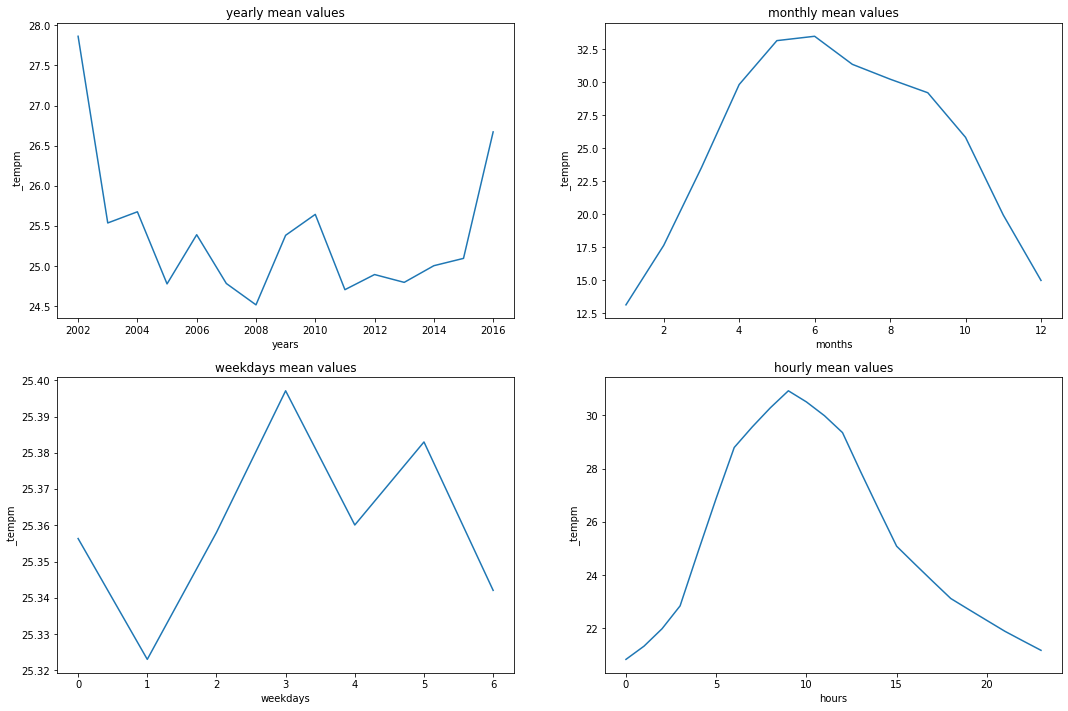

In [32]:
plotAggregateValues(newdata, "_tempm")

We can see highest temperature during 4.5th to 6.5th month as it is summer time (we know because in india april-may-june are summer months) and low temperature during the end and start of the year because of winter.
Also, there is high temperature during 9-12 hours as it is noon time and low temperature during night hours.

Now let's also see the temperature distribution.

C:\Users\kp779\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000002850F187B20> has a label of '_tempm' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


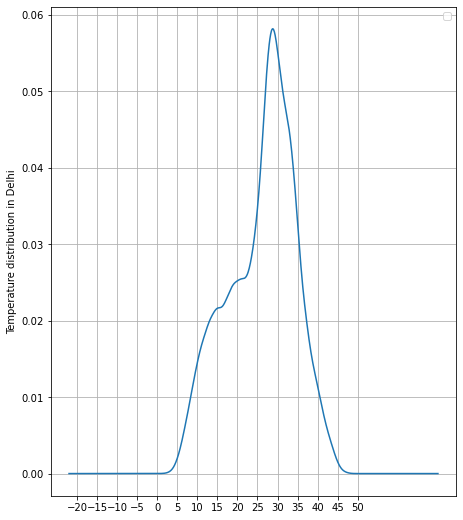

In [33]:
plt.figure(figsize=(16,9))

ax2 = plt.subplot(122)
data['_tempm'].plot(ax=ax2,legend=True,kind='density')
ax2.set_ylabel('Temperature distribution in Delhi', fontsize=10)
plt.xticks(np.arange(-20, 55, 5))
plt.grid()

In [34]:
newdata['_tempm'].describe()

count    129864.000000
mean         25.359964
std           8.256106
min           1.000000
25%          19.000000
50%          27.000000
75%          31.333333
max          47.000000
Name: _tempm, dtype: float64

C:\Users\kp779\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_tempm'>

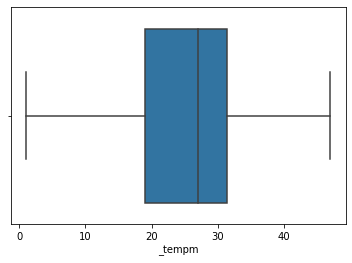

In [35]:
sns.boxplot(newdata['_tempm'])

Here we can clearly see that around half of the temperature data is mostly ranging between 25-27 degree celcius. 

Let's split our data to train and test. Instead of splitting through sklearn we are doing it manually because we want till 2014 and then to train on the data of 2015 onwards.

In [36]:
train = newdata[:'2014']
test = newdata['2015':]

In [37]:
import statsmodels.api as sm

# Let's decompose the time series to visualize trend, season and noise seperately
def decomposeNplot(data):
    decomposition = sm.tsa.seasonal_decompose(data)

    plt.figure(figsize=(16,9))
    sns.set_style(style='darkgrid')
    
    ax1 = plt.subplot(411)
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')

    ax2 = plt.subplot(412)
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')

    ax3 = plt.subplot(413)
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')

    ax4 = plt.subplot(414)
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residuals')
    

    return decomposition

In [38]:
# Resampling the data to mothly and averaging out the temperature & we will predict the monthly average temperature
ftraindata = train['_tempm'].resample('M').mean()
ftestdata = test['_tempm'].resample('M').mean()

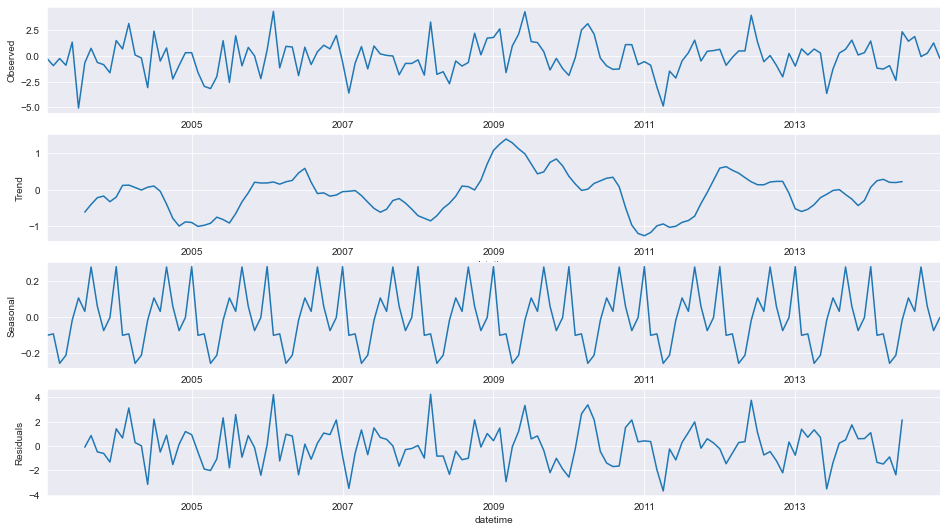

In [39]:
#Lets take the seasonal difference of 12 so that we can check with the previous years......with the difference of 12 months.
decomposition = decomposeNplot(ftraindata.diff(12).dropna())

Here we see that the pattern in seasonal plot, it looks season in yearly pattern. 

In [40]:
dftest = sm.tsa.stattools.adfuller(ftraindata.diff(12).dropna())
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.408735949596537
2. P-Value :  3.2469985126588016e-06
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 131
5. Critical Values :
	 1% :  -3.481281802271349
	 5% :  -2.883867891664528
	 10% :  -2.5786771965503177


Since we see that the p value here is less than 0.05, thus we can say that the time series is stationary. So, now we are good to go for the model. 

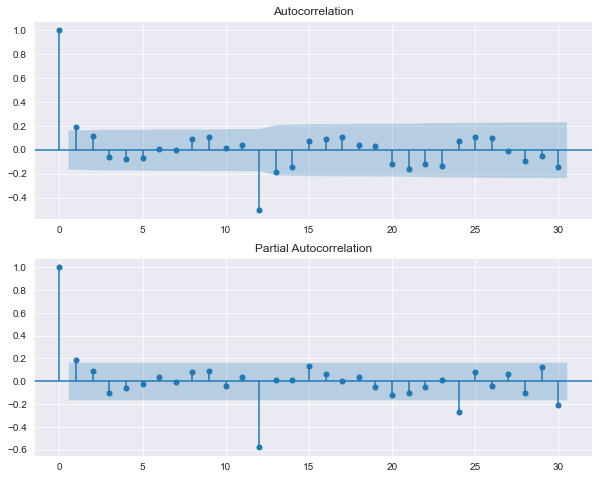

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=30,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=30,ax=ax2)

Since we can't identify which model to use whether AR or MA or what, lets go little further and plot with seasonal lags and try to find out 

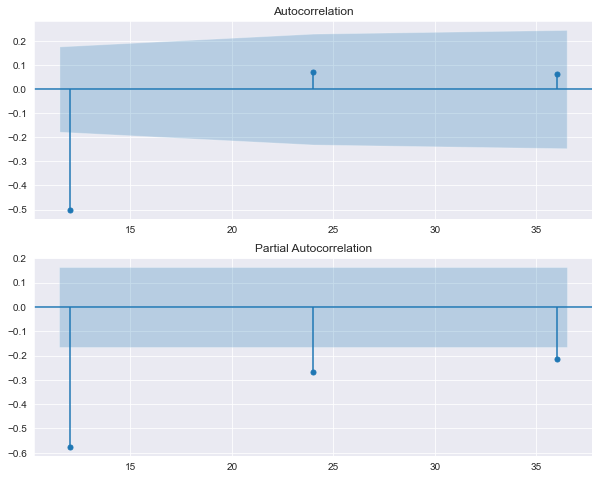

In [42]:
lags = [12,24,36]

plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=lags,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=lags,ax=ax2)

Now here we can see that we have to use the MA model with Q=1. So, let's go with that.

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
model = SARIMAX(ftraindata,order=(0,0,1),seasonal_order=(0,1,1,12),trend='n')
results = model.fit()

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             _tempm   No. Observations:                  155
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -240.262
Date:                            Tue, 01 Mar 2022   AIC                            486.525
Time:                                    22:49:42   BIC                            495.413
Sample:                                02-28-2002   HQIC                           490.136
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2568      0.073      3.501      0.000       0.113       0.401
ma.S.L12      -0.8617      0.120     -7.171      0.000      -1.097      -0.626
sigma2         1.5067      0.203      7.415      0.000       1.108       1.905
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.81   Prob(JB):                         0.60
Heteroskedasticity (H):               0.56   Skew:                            -0.05
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
print(np.mean(np.abs(results.resid)))

2.974158605918116


Here we can see that the mean Absolute Error for training data is around 3.


In [54]:
forecast = results.get_forecast(steps=len(ftestdata))

In [55]:
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]

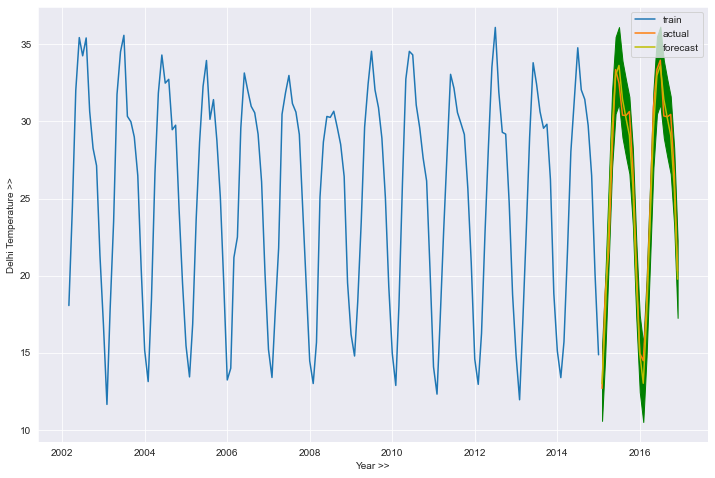

In [56]:
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='y', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='green')

plt.xlabel('Year >> ')
plt.ylabel('Delhi Temperature >>')
plt.legend()
plt.show()

Thanks 